Проведем небольшой анализ данных о рейсах за 2013 год из аэропортнов Нью-Йорка. Для начала подключим необходимые библиотеки (для работы с датасетом, для построения графиков и диаграмм), загрузим данные и отредактируем вывод в консоль

In [226]:
import pandas as pd
import numpy as np
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import scipy. stats as st


data_path = Path (pathlib.Path.cwd(),'/Users/polinaorlova/Downloads/flights_NY.csv')
df= pd.read_csv(data_path)
#df=pd.read_html("https://drive.google.com/file/d/1drJ6nqvE0sCSbY2gxlYBu_4jgEHmb2C2/view")
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth', None)

Посмотрим, есть ли в датасете пропуски - пустые ячейки.

In [4]:
print("кол-во пропущенных значений по столбцам:\n",df.isnull().sum())

кол-во пропущенных значений по столбцам:
 year            0
month           0
day             0
dep_time     8255
dep_delay    8255
arr_time     8713
arr_delay    9430
carrier         0
tailnum      2512
flight          0
origin          0
dest            0
air_time     9430
distance        0
dtype: int64


 Нулевые ячейки содержатся только в 6 стоблцах. Посмотрим, связаны они как-то между собой или нет. Добавим еще несколько стоблцов: каждый из них будет содержать только 0 и 1
 
 0 - если в начальной таблице отсутсвуют данные с определенной информацией;
 1 - если данные доступны
 
 Посмотрим, есть ли данные по задержкам прилета, когда отсутсвуют данные длительности полета, времени отправления и прибытия

In [5]:
df['air_time_av'] = np.where(df['air_time'].isnull(),0,1)
df['dep_time_av'] = np.where(df['dep_time'].isnull(),0,1)
df['arr_time_av'] = np.where(df['arr_time'].isnull(),0,1)
df['tailnum_av'] = np.where(df['tailnum'].isnull(),0,1)
print(df.groupby(df['air_time_av'])['arr_delay'].mean(),'\n'*2) 
print(df.groupby(df['dep_time_av'])['arr_delay'].mean(),'\n'*2)
print(df.groupby(df['arr_time_av'])['arr_delay'].mean(),'\n'*2)

air_time_av
0         NaN
1    6.895377
Name: arr_delay, dtype: float64 


dep_time_av
0         NaN
1    6.895377
Name: arr_delay, dtype: float64 


arr_time_av
0         NaN
1    6.895377
Name: arr_delay, dtype: float64 




Данные о задрежке прилета отсутсвуют, когда нет информации в перечисленных стоблцах[dep_time | air_time | arr_time]. Видимо, задержка прилета высчитывается автоматически.

In [7]:
print(df.groupby(df['dep_time_av'])['dep_delay'].mean(),'\n'*2)

dep_time_av
0         NaN
1    12.63907
Name: dep_delay, dtype: float64 




Данные о задержке вылета присутсвуют, только если есть информация о времени вылета

* можно было это предположить, только взгялнув на кол-во пропущенных значений в датасете, однако группировка по наличию данных в ячейке однозначно говорит об этом

In [24]:
print(df['origin'].value_counts())
print(df.groupby(df['origin'])['dep_time_av'].mean())
print(df.groupby(df['origin'])['arr_time_av'].mean())

origin
EWR    120835
JFK    111279
LGA    104662
Name: count, dtype: int64
origin
EWR    0.973195
JFK    0.983258
LGA    0.969874
Name: dep_time_av, dtype: float64
origin
EWR    0.971945
JFK    0.982072
LGA    0.968202
Name: arr_time_av, dtype: float64


Выше мы видим общее кол-во рейсов в каждом из аэропортов и вероятность того, что они получат время задержки вылета/прилета 
Можно сказать, что данные не загружаются в таблицу не столько потому, что из-за большого потока рейсов это просто забывают сделать. Возможно, есть какие-то различия в организации работы аэропортов -- системная ошибка приводит к потере данных о времени задержки вылета/прилета

In [45]:
print(df.groupby(df['dep_time'])['dep_delay'].mean().sort_values(ascending=False).head(25))
#do=df[df['dep_time']>140]
#print(do.groupby(df['dep_time'][df['dep_time']<500])['origin'].value_counts().head(30))

dep_time
353.0    503.000000
251.0    471.000000
226.0    446.000000
149.0    441.500000
133.0    418.000000
245.0    405.000000
241.0    401.000000
325.0    375.000000
159.0    372.000000
229.0    364.000000
318.0    348.000000
210.0    340.000000
315.0    325.000000
317.0    317.500000
146.0    316.666667
143.0    314.166667
207.0    303.666667
246.0    301.000000
249.0    299.000000
204.0    296.500000
218.0    293.000000
220.0    290.000000
156.0    286.000000
145.0    286.000000
214.0    281.000000
Name: dep_delay, dtype: float64


Если посчитать среднее значение задержки вылета в зависимости от времени суток, то будет заметно, что самые большие значения ночью и ранним утром (такой результат скорее объясняется человеческим фактором, чем системными ошибками)

In [46]:
print(df.groupby(df['carrier'])['tailnum_av'].mean().sort_values(),'\n'*2)
print(df.groupby(df['carrier'])['dep_time_av'].mean().sort_values(),'\n'*2)
print(df.groupby(df['origin'])['dep_time_av'].mean().sort_values(),'\n'*2)

carrier
9E    0.943445
US    0.967715
UA    0.988306
F9    0.995620
AA    0.997433
WN    0.997556
MQ    0.999924
AS    1.000000
B6    1.000000
DL    1.000000
EV    1.000000
FL    1.000000
HA    1.000000
OO    1.000000
VX    1.000000
YV    1.000000
Name: tailnum_av, dtype: float64 


carrier
OO    0.906250
YV    0.906822
9E    0.943445
EV    0.948000
MQ    0.953252
US    0.967715
FL    0.977607
AA    0.980568
WN    0.984358
UA    0.988306
B6    0.991471
DL    0.992746
VX    0.993995
F9    0.995620
AS    0.997199
HA    1.000000
Name: dep_time_av, dtype: float64 


origin
LGA    0.969874
EWR    0.973195
JFK    0.983258
Name: dep_time_av, dtype: float64 




Если посмотреть на вероятность получения данных о номере борта, то видно, что некоторые авакомпании невсегда предоставляют данные о судне

Удалим все строки с пропусками в данных. Посмотрим сначала на полученные данные в общем.

/var/folders/hd/0v608vvj7x73mzzychs7cqw80000gn/T/ipykernel_26270/1573384160.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['dep_delay'], hist=True, kde=False,color='red',norm_hist=True)
/var/folders/hd/0v608vvj7x73mzzychs7cqw80000gn/T/ipykernel_26270/1573384160.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63727

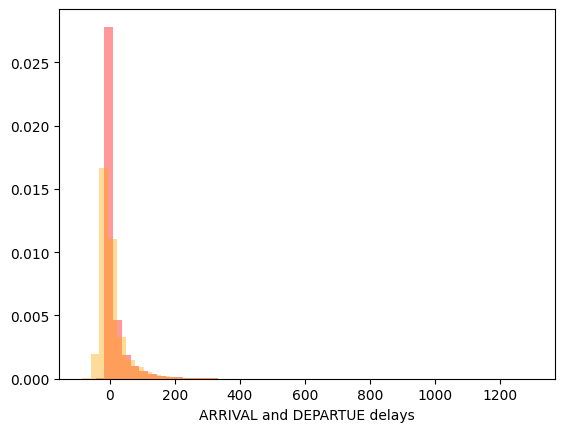

            dep_time       arr_time      dep_delay      arr_delay
count  327346.000000  327346.000000  327346.000000  327346.000000
mean     1348.789883    1501.908238      12.555156       6.895377
std       488.319979     532.888731      40.065688      44.633292
min         1.000000       1.000000     -43.000000     -86.000000
25%       907.000000    1104.000000      -5.000000     -17.000000
50%      1400.000000    1535.000000      -2.000000      -5.000000
75%      1744.000000    1940.000000      11.000000      14.000000
max      2400.000000    2400.000000    1301.000000    1272.000000


In [65]:
df=df.dropna()
sns.distplot(df['dep_delay'], hist=True, kde=False,color='red',norm_hist=True)
sns.distplot(df['arr_delay'], hist=True, kde=False,color='orange',norm_hist=True)
plt.xlabel('ARRIVAL and DEPARTUE delays')
plt.show()
print(df[['dep_time','arr_time','dep_delay','arr_delay']].describe())

mean - среднее значение по колонке
std - стандартное отклонение 
50% - медиана значений
Максимальные и минимальные значения очень сильно отличаются от основной части данных (в обоих столбцах задержек), то есть для общего описания распределения мы можем ограничить диапазон: рассмотрим отдельно основную часть данных и экстримальные значения - выбросы


Посмотрим ближе на значения:

In [61]:
filter1=df['dep_delay'].sort_values(ascending=False)
print(filter1.head(20000))
filter2=df['dep_delay'].sort_values()
print(filter2.head(1000))

filter3=df['arr_delay'].sort_values(ascending=False)
print(filter3.head(20000))
filter4=df['arr_delay'].sort_values()
print(filter4.head(1000))

7072      1301.0
235778    1137.0
8239      1126.0
327043    1014.0
270376    1005.0
           ...  
165807      76.0
300879      76.0
127854      76.0
319752      76.0
75890       76.0
Name: dep_delay, Length: 20000, dtype: float64
89673    -43.0
113633   -33.0
64501    -32.0
9619     -30.0
24915    -27.0
          ... 
59383    -14.0
7328     -14.0
229437   -14.0
229417   -14.0
236941   -14.0
Name: dep_delay, Length: 1000, dtype: float64
7072      1272.0
235778    1127.0
8239      1109.0
327043    1007.0
270376     989.0
           ...  
167895      79.0
286597      79.0
91280       79.0
36856       79.0
43761       79.0
Name: arr_delay, Length: 20000, dtype: float64
199668   -86.0
211124   -79.0
198763   -75.0
195236   -75.0
196935   -74.0
          ... 
206104   -51.0
37521    -51.0
299693   -51.0
114591   -51.0
199602   -51.0
Name: arr_delay, Length: 1000, dtype: float64


Уже в первых 20.000 максимальных значений (а это около 5% всех данных), выстроенных по убыванию, числа <80, т.е. в 16 раз отличаются от максимального
И в первых 1.000 минимальных значений, выстроенных по возрастанию, числа ≈-15, т.е. в 3 раза отличаются от минимального
Получается, что небольшое кол-во данных сильно выбивается из общей тенденции и мешает изучению основого массива значений.
Аналогичные рассуждения относительно arrival delays приводят нас к диапазону рассмотрения примерно равному [-60;90]

/var/folders/hd/0v608vvj7x73mzzychs7cqw80000gn/T/ipykernel_26270/4007290099.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filter1, hist=True, kde=False, color='green',norm_hist=True)
/var/folders/hd/0v608vvj7x73mzzychs7cqw80000gn/T/ipykernel_26270/4007290099.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe

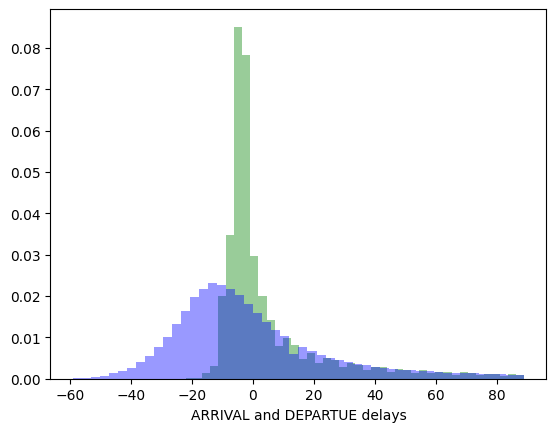

In [129]:
filter1=filter1[filter1<90]
filter1=filter1[filter1>-60]
filter3=filter3[filter3<90]
filter3=filter3[filter3>-60]
sns.distplot(filter1, hist=True, kde=False, color='green',norm_hist=True)
sns.distplot(filter3, hist=True, kde=False, color='blue',norm_hist=True)
plt.xlabel('ARRIVAL and DEPARTUE delays')
plt.show()

Полученные гистограммы задержек напоминают нормальное распределение. Такое приближение приемлимо, ведь если на результаты измерений влияет большое число случайных факторов, то вся совокупность  стремится к функции Гаусса
 
Посмотрим на средние задержки вылета для каждой авакомпании 

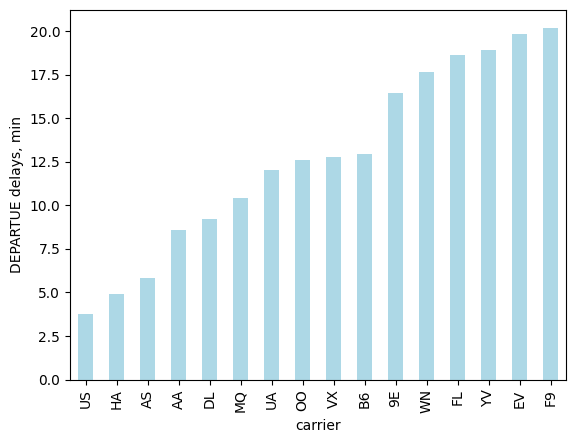

In [197]:
dw=df.groupby(df['carrier'])['dep_delay'].mean().sort_values()
#dw.reset_index('carrier')
dw.plot.bar(color='lightblue')
plt.ylabel('DEPARTUE delays, min')

plt.show()

на диаграмме видно, что средние задержки рейсов разных компаний отличаются достаточно сильно.

Однако стоит оценить и доверительный интервал для каждого перевозчика 

In [198]:
dr=df.carrier.unique()
#D=DataPhrame
for i in range(0,16):
    D=df['dep_delay'][df['carrier']==dr[i]]
    print(dr[i],'\t',round(D.mean(),2),'\t',st.norm.interval(confidence=0.95,loc=np.mean(D),scale=st.sem(D)))

    
dw=df.groupby(df['carrier'])['dep_delay'].mean().sort_values()
dg=df.groupby(df['carrier'])['arr_delay'].mean().sort_values()
dg.reset_index('carrier')
DW=pd.concat([dw,dg],axis=1)
DW['carrier']=DW.index
#ax=sns.lineplot(x=DW['carrier'],y=DW['dep_delay'], errorbar=('ci',95))
#plt.show()

UA 	 12.02 	 (11.727063248665063, 12.306753510879433)
AA 	 8.57 	 (8.15939694006563, 8.978863303462713)
B6 	 12.97 	 (12.643982872074938, 13.291113059394656)
DL 	 9.22 	 (8.867915102687565, 9.579984515424819)
EV 	 19.84 	 (19.436255323216177, 20.241603329049614)
MQ 	 10.45 	 (9.961985940458286, 10.92877573226608)
US 	 3.74 	 (3.3558371090894665, 4.133548196744833)
WN 	 17.66 	 (16.889469650974604, 18.43384486247608)
VX 	 12.76 	 (11.550510840868105, 13.962780793221027)
FL 	 18.61 	 (16.78014910305339, 20.43181940088362)
AS 	 5.83 	 (3.5174840238526257, 8.14401103961705)
9E 	 16.44 	 (15.761632386633094, 17.1175164511141)
F9 	 20.2 	 (15.814659441186004, 24.587690044863926)
HA 	 4.9 	 (-2.9537837068581743, 12.754953297501448)
YV 	 18.9 	 (14.767439906928773, 23.030354210718286)
OO 	 12.59 	 (-3.0879273958018345, 28.260341188905283)


Многие значения имеют относильно узкий доверительный интервал(UA,AA,B6,EV,MQ,US). Можно сделать вывод, что эти перевозчики систематически задерживают свои рейсы. Вероятно из-за внутренних проблем с организацией преревозок.

Остальные же наоборот, имеют очень широкий диапазон задержек рейсов. Возможно, такой результат объясняется тем, что в зависимости, например, от направления, появляются непредвиденные обстоятельства, мешающие команде при отправлении.


Рассмотрим зависимость средней задержки вылета от местного времени вылета.

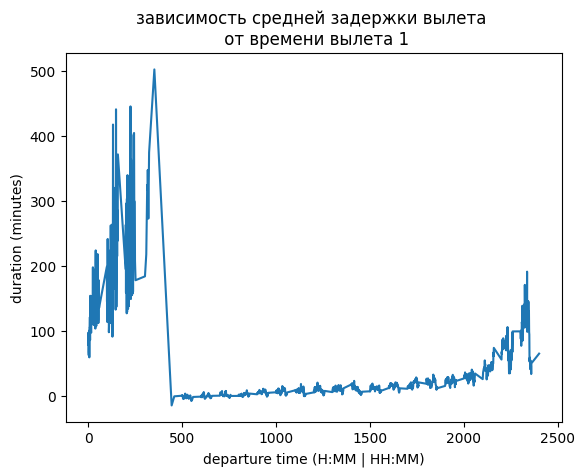

In [205]:
(df.groupby(df['dep_time'])['dep_delay'].mean()).plot(x='dep_time',y='dep_delay')
plt.title("зависимость средней задержки вылета \n от времени вылета 1")
plt.xlabel('departure time (H:MM | HH:MM)')
plt.ylabel('duration (minutes)')
plt.show()

Ночью задержки вылетов, как мы и выяснили ранее, куда чаще, дольше и беспорядочнее, чем днем или вечером, но около 3-4 утра среднее время задержки резко падает: 
скорее всего, это происходит из-за заметного уменьшения числа вылетов (очень неудобное время вылета для пассажиров, поэтому авиакомпании, наверное, стараются выбирать другие часы). Также может быть, что как раз в этот момент начинается новая смена в аэропорту (вряд ли ночная смена так же многочислена, как и дневная - увеличение числа персонала)

В течение дня задержка "копится", заметно увеличиваясь к вечеру: 
скорее всего растет поток людей в аэропорту (лететь удобнее вечером - увеличивается нагрузка на внутренние структуры аэропорта; приходится ждать больше людей перед отправлением), персонал устает к концу рабочего дня (влияние человеческого фактора на время вылета увеличивается), кол-во самолетов, ожидающих разрешение на взлет, растет (некоторые вынуждены долго ждать свою очередь на взлетную полосу)

Небольшие промежутки между колебаниями значения задержки можно объяснить тем, что, возможно, сразу нескольким самолетам назначают одно и то же время вылета (или же промежутки между ними очень малы), тогда получается, что задержка одного рейса неминуемо ведет к задержке второго(тоже накопление задержки, но только в течение часа)

Помимо задержки других рейсов часто бывает такое, что самолет не успевают подготовить к новому рейсу (возможно из-за задержки его прошлого полета), это тоже влияет на общую ситуацию задержки отправлений. 
 
Вероятно, не хватает мощностей и ресурсов аэропортов для аккуратного следования расписанию 


Однако, сконцентрируемся на положительных задержках взлета:

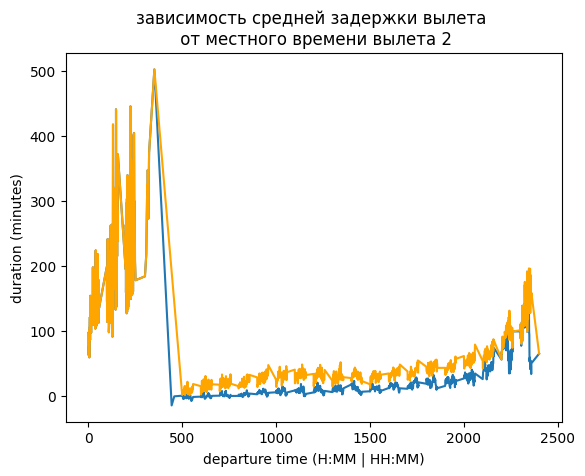

In [206]:
(df.groupby(df['dep_time'])['dep_delay'].mean()).plot(x='dep_time',y='dep_delay')
dfp=df[df['dep_delay']>0]  ##    ТОЛЬКО ПОЛОЖИТЕЛЬНАЯ задержка рейсов
dfp.groupby(dfp['dep_time'])['dep_delay'].mean().plot(x='dep_time',y='dep_delay',color='orange')
plt.title("зависимость средней задержки вылета \n от местного времени вылета 2")
plt.xlabel('departure time (H:MM | HH:MM)')
plt.ylabel('duration (minutes)')
plt.show()

Как ни странно, график, построенный на основе только положительных задержек вылетов, только немного выше первого на промежутке [утро;день], а ночью претерпевает такие же колебания.

Это объясняется совсем небольшим вкладом отрицательных задержек в среднее значение: как было видно из данных, кроме того, что отрицательные задержки составляют небольшую часть от всего датасета, так еще и их модули малы
(это неудивительно, ведь редко когда в реальной жизни самолету удается вылететь гораздо раньше назначенного времени)

Посмотрим, зависит ли средняя задержка рейсов в месяц от числа вылетов: построим на одних осях графики зависимости 
1)mean_departure_delay(month) 
2)number_of_flights(month)

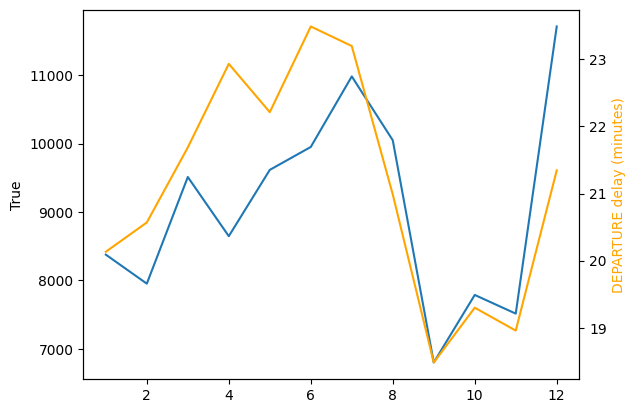

In [218]:
ndfp=dfp.groupby(dfp['month'])['dep_delay'].mean()
nndfp=dfp['month'].value_counts()
nndfp.reset_index('month')
ndfp.reset_index('month')
nndfp=nndfp.sort_index(ascending=True)

fig,ax=plt.subplots()
ax.plot(nndfp)
ax.set_ylabel(nndfp.all())

ax2=ax.twinx()
ax2.plot(ndfp,color='orange')
ax2.set_ylabel('DEPARTURE delay (minutes)',color='orange')
plt.show()

кажется, что построенные графики связаны между собой: рост одного, как будто, приводит к росту второго.

убедимся в этом - найдем коэффицент корреляции 

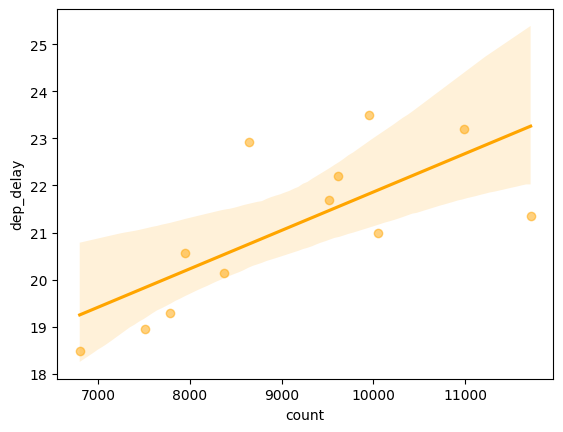

PearsonRResult(statistic=0.7181419368710481, pvalue=0.008525468356771414)


In [224]:
data=pd.concat([ndfp,nndfp],axis=1)
sns.regplot(x='count',y='dep_delay',data=data, scatter_kws={"color": "orange","alpha":0.5},line_kws={"color":"orange"})
plt.show()

print(st.pearsonr(nndfp,ndfp))

коэффицент корреляции 0.7≈1
значит, мы можем сделать вывод, что найденная зависимость средней задержки от числа рейсов статистически значима 